# Installation

In [ ]:

# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools
!pip install -U "mxnet<2.0.0"
# Install pre-release, frozen to a particual pre-release for stability
!pip install --pre "autogluon==0.0.16b20201214"


     |████████████████████████████████| 1.6MB 5.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 818 kB 5.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 72 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 309 kB 6.4 MB/s 
     |████████████████████████████████| 41 kB 581 kB/s 
     |████████████████████████████████| 242 kB 8.4 MB/s 
     |████████████████████████████████| 81 kB 6.8 MB/s 
     |████████████████████████████████| 964 kB 9.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 206 kB 18.0 MB/s 
     |████████████████████████████████| 131 kB 17.0 MB/s 
     |████████████████████████████████| 1.0 MB 16.5 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 997 kB 22.2 MB/s 
     |████████████████████████████████| 119 kB 34.1 MB/s 
     |█████████████████

In [ ]:

import autogluon.core as ag
from autogluon.tabular import TabularPrediction as task
import pandas as pd


# Loading Data and splitting it 70:30, discarded val_data and used test_data as tuning data.

In [ ]:
import numpy as np

df = task.Dataset(file_path='/content/csv_nfl_data.csv')
df=df.drop("nfl_data", axis=1)
df=df.drop("Date(IST)", axis=1) #dropping unnecessary columns
train_data=df.sample(frac=0.7,random_state=200) #random state is a seed value
test_data=df.drop(train_data.index)
print(train_data.head())
label_column1 = 'NFH'
label_column2 = 'NFL'
print("Summary of occupation column: \n", train_data['NFH'].describe())
print("Summary of occupation column: \n", train_data['NFL'].describe())
y_test1 = test_data[label_column1]
y_test2 = test_data[label_column2]
test_data_nolabel1 = test_data.drop(labels=[label_column1], axis=1)  # delete label column
test_data_nolabel2 = test_data.drop(labels=[label_column2], axis=1)  # delete label column

metric = 'root_mean_squared_error' 


             NFO           NFH           NFL  ...    Flow  Shine       Vega
148  11357.96517  11381.132870  11310.696470  ... -0.1501  -0.15  -0.080000
103  10247.15929  10313.215680  10154.598240  ... -0.8900  -0.77  13.220001
68    9318.94439   9355.218783   9145.425252  ... -0.3872   0.38   5.680000
287  15174.49527  15158.971890  14845.503450  ... -0.1800  -0.06  -0.240000
174  11382.00132  11382.183970  11128.337290  ... -0.0714  -1.28   1.719999

[5 rows x 20 columns]
Summary of occupation column: 
 count      251.000000
mean     12528.728156
std       2171.718477
min       7988.390033
25%      11046.420660
50%      12165.472690
75%      14717.587875
max      15910.968840
Name: NFH, dtype: float64
Summary of occupation column: 
 count      251.000000
mean     12340.914254
std       2196.888413
min       7372.225778
25%      10870.861910
50%      12059.951990
75%      14491.338935
max      15804.933350
Name: NFL, dtype: float64


# I choose the method of evaluation as the root mean squared error for it to detect that the mode of learning I'm using is linear regression

In [ ]:
test_data


,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
0,12115.67324,12177.11996,12151.57155,12216.27237,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.3970,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
1,12195.40645,12275.48738,12173.35595,12251.19693,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.20,879.0,973.0,-0.23,-0.5100,-1.33,0.46,0.4430,0.5648,0.08,1.550000
3,12237.30935,12242.22714,12030.37114,12051.96001,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.0500,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
6,12093.35333,12173.39419,12035.41437,12117.86214,4679.66,4101.38,578.28,4438.75,4690.49,-251.74,1024.0,811.0,0.02,0.0500,-0.69,-0.51,-0.2446,-0.1071,0.25,0.020000
7,12220.96655,12275.45649,12153.12931,12211.08750,4883.87,4815.63,68.24,4593.38,4546.21,47.17,1207.0,665.0,1.03,-0.0500,0.85,0.25,-0.1660,-0.2899,-0.40,-0.240001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,15884.06238,15917.53207,15814.82203,15895.37615,5940.25,6810.54,-870.29,4027.52,4901.72,-874.20,726.0,1291.0,0.54,-0.3799,-1.63,1.06,-0.0325,-0.1000,-0.34,1.129999
346,15889.39525,15921.67743,15798.54602,15838.22011,6727.57,7607.30,-879.73,5107.52,5062.28,45.24,687.0,1324.0,-1.41,-0.2050,-2.05,2.44,0.8465,-0.3900,-1.42,-0.400000
352,15781.79918,15846.87571,15703.02491,15763.67965,6766.31,7445.15,-678.84,6844.01,5011.25,1832.76,1070.0,902.0,0.54,0.1000,0.18,0.27,-0.0515,0.1500,-0.08,-0.350000
355,15858.31968,15870.70765,15770.34334,15787.25576,6057.48,7704.14,-1646.66,6171.14,4650.96,1520.18,965.0,1017.0,-0.02,-0.3200,0.30,-1.05,0.0520,-0.0300,0.15,-0.190001


# Predicting **NFH**
Lets start by taking a look at how preset hyperparameters perform with our dataset

In [ ]:
presets = ['good_quality_faster_inference_only_refit', 'optimize_for_deployment']#training from custom presets
predictor_light1 = task.fit(train_data=train_data, label=label_column1, eval_metric=metric,
                           presets=presets, time_limits=80)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_200933/
Beginning AutoGluon training ... Time limit = 80s
AutoGluon will save models to AutogluonModels/ag-20210712_200933/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    251
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15910.968840000001, 7988.390033, 12528.72816, 2171.71848)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12643.19 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based o

[1000]	train_set's rmse: 2.32461	valid_set's rmse: 117.74
[1000]	train_set's rmse: 1.38726	valid_set's rmse: 95.306
[2000]	train_set's rmse: 0.0543545	valid_set's rmse: 94.929
[3000]	train_set's rmse: 0.0023402	valid_set's rmse: 94.9176
[4000]	train_set's rmse: 0.000109293	valid_set's rmse: 94.9171
[5000]	train_set's rmse: 4.99819e-06	valid_set's rmse: 94.9171
[6000]	train_set's rmse: 2.18159e-07	valid_set's rmse: 94.9171
[7000]	train_set's rmse: 9.76109e-09	valid_set's rmse: 94.9171
[8000]	train_set's rmse: 4.36902e-10	valid_set's rmse: 94.9171
[9000]	train_set's rmse: 2.69394e-11	valid_set's rmse: 94.9171


	-92.4039	 = Validation root_mean_squared_error score
	12.02s	 = Training runtime
	0.07s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L1 ... Training model for up to 79.9s of the 31.13s of remaining time.
	-60.1444	 = Validation root_mean_squared_error score
	0.34s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 49.23s ...
Fitting model: ExtraTreesMSE_FULL_BAG_L0 ...
	0.51s	 = Training runtime
Fitting model: XGBoost_FULL_BAG_L0 ...
	0.1s	 = Training runtime
Fitting model: LightGBMCustom_FULL_BAG_L0 ...


[1000]	train_set's rmse: 0.794546
[2000]	train_set's rmse: 0.0297369


	3.03s	 = Training runtime
Fitting model: CatBoost_FULL_BAG_L0 ...
	1.75s	 = Training runtime
Fitting model: WeightedEnsemble_FULL_L1 ...
	-60.1444	 = Validation root_mean_squared_error score
	0.18s	 = Training runtime
	0.0s	 = Validation runtime
Deleting model RandomForestMSE_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/RandomForestMSE_BAG_L0/ will be removed.
Deleting model ExtraTreesMSE_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/ExtraTreesMSE_BAG_L0/ will be removed.
Deleting model LightGBM_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/LightGBM_BAG_L0/ will be removed.
Deleting model LightGBMXT_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/LightGBMXT_BAG_L0/ will be removed.
Deleting model CatBoost_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/CatBoost_BAG_L0/ will be removed.
Deleting model XGBoost_BAG_L0. All files under AutogluonModels/ag-20210712_200933/models/XGBoost_BAG_L0/ 

# Best-Fit model from above experiment is the **WeightedEnsemble_FULL_L1 with rmse: 60.1444**

In [ ]:
y_pred = predictor_light1.predict(test_data_nolabel1)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor_light1.evaluate_predictions(y_true=y_test1, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: 67.58305278473728
Evaluations on test data:
{
    "root_mean_squared_error": 67.58305278473728,
    "mean_absolute_error": 40.00415886653037,
    "explained_variance_score": 0.9989277686351993,
    "r2_score": 0.9989163758932471,
    "pearson_correlation": 0.9994680346920847,
    "mean_squared_error": 4567.469023704585,
    "median_absolute_error": 29.74259875000098
}


Predictions:   [12221.377, 12267.136, 12196.645, 12126.8955, 12251.656]


# Hypertuning custom parameters:

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_201347/
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to AutogluonModels/ag-20210712_201347/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    251
Train Data Columns: 19
Tuning Data Rows:    107
Tuning Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15910.968840000001, 7988.390033, 12528.72816, 2171.71848)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12567.48 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available me

Time out (secs) is 81.0


	-151.7077	 = Validation root_mean_squared_error score
	0.67s	 = Training runtime
	0.01s	 = Validation runtime
	-149.1502	 = Validation root_mean_squared_error score
	0.65s	 = Training runtime
	0.01s	 = Validation runtime
	-183.7653	 = Validation root_mean_squared_error score
	0.62s	 = Training runtime
	0.0s	 = Validation runtime
	-1106.7489	 = Validation root_mean_squared_error score
	0.68s	 = Training runtime
	0.0s	 = Validation runtime
	-142.3375	 = Validation root_mean_squared_error score
	0.61s	 = Training runtime
	0.01s	 = Validation runtime
	-641.5929	 = Validation root_mean_squared_error score
	0.63s	 = Training runtime
	0.01s	 = Validation runtime
	-166.6103	 = Validation root_mean_squared_error score
	0.64s	 = Training runtime
	0.01s	 = Validation runtime
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending 

Time out (secs) is 81.0


Please either provide filename or allow plot in get_training_curves
	-931.2128	 = Validation root_mean_squared_error score
	4.08s	 = Training runtime
	0.01s	 = Validation runtime
	-292.0079	 = Validation root_mean_squared_error score
	6.63s	 = Training runtime
	0.01s	 = Validation runtime
	-131.9083	 = Validation root_mean_squared_error score
	3.09s	 = Training runtime
	0.01s	 = Validation runtime
	-206.3022	 = Validation root_mean_squared_error score
	4.47s	 = Training runtime
	0.01s	 = Validation runtime
	-279.4608	 = Validation root_mean_squared_error score
	5.73s	 = Training runtime
	0.01s	 = Validation runtime
	-505.9739	 = Validation root_mean_squared_error score
	6.45s	 = Training runtime
	0.01s	 = Validation runtime
	-1747.541	 = Validation root_mean_squared_error score
	4.39s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L1 ... Training model for up to 179.89s of the 122.64s of remaining time.
	-106.2065	 = Validation root_mean_squared_error 

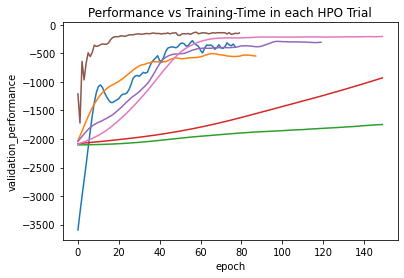

In [ ]:
hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = {  
    'num_epochs': 150,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': ag.space.Categorical('softrelu','tanh','relu','tanh','softrelu'), #changed layers
   'layers': ag.space.Categorical([500],[300,200],[300],[50],[1]),    
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  
    'num_leaves': ag.space.Int(lower=14, upper=46, default=36),  
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options, 
                   'NN': nn_options,  
                  }  

time_limits = 3*60  # train various models for ~3 min
num_trials = 7  
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine

predictor1 = task.fit(train_data=train_data, tuning_data=test_data, label=label_column1,
                     time_limits=time_limits, eval_metric=metric, num_trials=num_trials,
                     hyperparameter_tune=hp_tune, hyperparameters=hyperparameters,
                     search_strategy=search_strategy)

# Evaluation: root_mean_squared_error on test data: 106.2065 is one of my best root mean square errors for NFH, upon making efforts to maximize it to 0. Further I use auxillary metrics to dive deeper into it's evaluation.

In [ ]:
y_pred = predictor1.predict(test_data_nolabel1)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor1.evaluate_predictions(y_true=y_test1, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: 106.20645998324184
Evaluations on test data:
{
    "root_mean_squared_error": 106.20645998324184,
    "mean_absolute_error": 67.23065464778047,
    "explained_variance_score": 0.997324433221671,
    "r2_score": 0.9973238841263147,
    "pearson_correlation": 0.9987373555610141,
    "mean_squared_error": 11279.812142171952,
    "median_absolute_error": 43.25544781250028
}


Predictions:   [12282.721, 12254.49, 12178.774, 12160.157, 12158.549]


# Summary and HPO performace

*** Summary of fit() ***
Estimated performance of each model:
                      model    score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L1  -106.206460       0.048372  23.719881                0.000631           0.558995            1       True         15
1   NeuralNetMXNet/trial_12  -131.908295       0.005627   3.092342                0.005627           3.092342            0       True         10
2          LightGBM/trial_4  -142.337461       0.005836   0.613688                0.005836           0.613688            0       True          5
3          LightGBM/trial_1  -149.150184       0.006932   0.647878                0.006932           0.647878            0       True          2
4          LightGBM/trial_0  -151.707728       0.011365   0.668093                0.011365           0.668093            0       True          1
5          LightGBM/trial_6  -166.610308       0.006306   0.639240  

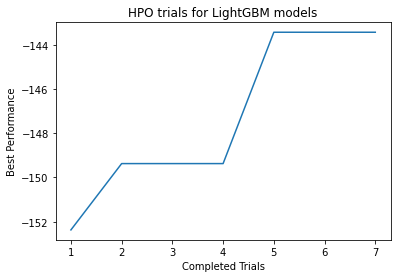

Plot summary of models saved to file: AutogluonModels/ag-20210712_201347/NeuralNetMXNet_HPOmodelsummary.html
Plot summary of models saved to file: NeuralNetMXNet_HPOmodelsummary.html
Plot of HPO performance saved to file: AutogluonModels/ag-20210712_201347/NeuralNetMXNet_HPOperformanceVStrials.png


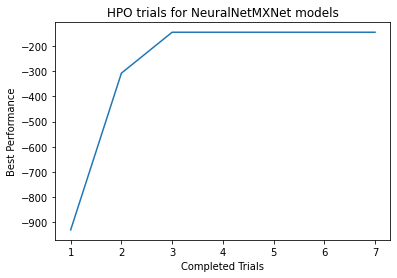

*** Details of Hyperparameter optimization ***
HPO for LightGBM model:  Num. configurations tried = 7, Time spent = 11.162271738052368s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: root_mean_squared_error = -143.43755863042762):
{'feature_fraction': 0.786854952987793, 'learning_rate': 0.08991032326510541, 'min_data_in_leaf': 15, 'num_leaves': 29}
HPO for NeuralNetMXNet model:  Num. configurations tried = 7, Time spent = 44.836161375045776s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: root_mean_squared_error = -144.44125366210938):
{'activation▁choice': 2, 'dropout_prob': 0.006926067236636415, 'embedding_size_factor': 1.1153484833935186, 'layers▁choice': 2, 'learning_rate': 0.0096645454263555, 'network_type▁choice': 0, 'use_batchnorm▁choice': 1, 'weight_decay': 1.6512111115863648e-07}
*** End of fit() summary ***


In [ ]:
results = predictor1.fit_summary()

# Model ensembling with stacking/bagging
Performance improve if you specify num_bagging_folds = 5-10, stack_ensemble_levels = 1-3 in the call to fit().
I provide all my available data as df because AutoGluon will split in more intellgent ways.


In [ ]:
predictor1 = task.fit(train_data=df, label=label_column1, eval_metric=metric,
                     num_bagging_folds=30, num_bagging_sets=2, stack_ensemble_levels=3,
                     hyperparameters = {'NN': {'num_epochs': 150}}  # last  argument is just for quick demo here, omit it in real applications
                    )

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_213550/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20210712_213550/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    358
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15921.677430000002, 7819.610704000001, 12487.76723, 2137.76477)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12468.54 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column va

In [ ]:
datapoint = test_data_nolabel1.iloc[[0]]  # Note: .iloc[0] won't work because it returns pandas Series instead of DataFrame
print(datapoint)
print(predictor1.predict(datapoint))

           NFO          NFL          NFC  ...    Flow  Shine      Vega
0  12115.67324  12151.57155  12216.27237  ...  0.0399   -0.1 -1.309999

[1 rows x 19 columns]
[12154.441]


#Top 3 tuned models:

In [ ]:
predictor1.leaderboard(test_data,extra_info=True, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,AG_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_AG_args_fit,ancestors,descendants
0,NeuralNetMXNet_BAG_L0,-66.183879,-171.283756,14.424392,13.261879,263.400344,14.424392,13.261879,263.400344,0,True,1,19,60,60,69245968,69245968,1158798,1158798,0,7,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Currey, FIIN, DIIN, August, DIIS, DAD, ...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 89},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L2, NeuralNetMXNet_BAG_L2, N..."
1,WeightedEnsemble_L1,-66.183879,-171.283756,14.426423,13.262607,263.405719,0.002031,0.000728,0.005375,1,True,2,1,1,61,2246,69248214,2246,1158798,1,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L0],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L0],[]
2,NeuralNetMXNet_BAG_L2,-73.880407,-200.446645,43.694064,40.395141,765.410065,14.774451,13.505455,251.251181,2,True,5,20,60,180,69971314,209188522,1171070,1171070,2,3,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 81},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L0]","[WeightedEnsemble_L4, WeightedEnsemble_L3, Neu..."
3,WeightedEnsemble_L3,-73.880407,-200.446645,43.695518,40.395823,765.413190,0.001454,0.000682,0.003125,3,True,6,1,1,181,2246,209190768,2246,1171070,3,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L2],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L2,...",[]
4,NeuralNetMXNet_BAG_L3,-78.899942,-183.601689,58.376417,54.056693,1017.750103,14.682353,13.661552,252.340039,3,True,7,20,60,240,69974104,279162626,1170998,1171070,3,1,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 81},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L2,...",[WeightedEnsemble_L4]
5,WeightedEnsemble_L4,-78.899942,-183.601689,58.377782,54.057454,1017.753660,0.001365,0.000762,0.003557,4,True,8,1,1,241,2246,279164872,2246,1171070,4,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L3],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L2,...",[]
6,NeuralNetMXNet_BAG_L1,-82.187113,-196.447737,28.919613,26.889686,514.158884,14.495222,13.627806,250.758540,1,True,3,20,60,120,69971240,139217208,1170996,1170996,1,5,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epo

# Predicting **NFL:**
Again, taking a look at how preset hyperparameters perform with our dataset

In [ ]:
presets = ['good_quality_faster_inference_only_refit', 'optimize_for_deployment']#training from custom presets
predictor_light2 = task.fit(train_data=train_data, label=label_column2, eval_metric=metric,
                           presets=presets, time_limits=120)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_211249/
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to AutogluonModels/ag-20210712_211249/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    251
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15804.93335, 7372.225778, 12340.91425, 2196.88841)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12498.02 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on colu

[1000]	train_set's rmse: 2.14703	valid_set's rmse: 114.944
[2000]	train_set's rmse: 0.0883693	valid_set's rmse: 114.788


	-111.9975	 = Validation root_mean_squared_error score
	5.0s	 = Training runtime
	0.03s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: RandomForestMSE_BAG_L0 ... Training model for up to 77.05s of the 77.05s of remaining time.
	-89.4106	 = Validation root_mean_squared_error score
	7.21s	 = Training runtime
	1.02s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L0 ... Training model for up to 72.93s of the 72.93s of remaining time.
	-69.8191	 = Validation root_mean_squared_error score
	5.17s	 = Training runtime
	1.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L0 ... Training model for up to 69.79s of the 69.79s of remaining time.
	-190.1485	 = Validation root_mean_squared_error score
	2.26s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L0 ... Training model for up to 68.65s of the 68.64s of remaining time.
	-232.0655	 = Validation root_mean_squared_error score
	2.26s	 = Training runtime
	0.02s	 = Validation runtime
Fit

[1000]	train_set's rmse: 2.92327	valid_set's rmse: 112.752
[2000]	train_set's rmse: 0.128684	valid_set's rmse: 112.436
[3000]	train_set's rmse: 0.00505704	valid_set's rmse: 112.42
[4000]	train_set's rmse: 0.000178348	valid_set's rmse: 112.42
[5000]	train_set's rmse: 5.41435e-06	valid_set's rmse: 112.42
[6000]	train_set's rmse: 1.80941e-07	valid_set's rmse: 112.42
[7000]	train_set's rmse: 5.84098e-09	valid_set's rmse: 112.42
[8000]	train_set's rmse: 1.88929e-10	valid_set's rmse: 112.42
[1000]	train_set's rmse: 2.42588	valid_set's rmse: 115.265


	-102.3343	 = Validation root_mean_squared_error score
	16.79s	 = Training runtime
	0.09s	 = Validation runtime
Completed 2/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L1 ... Training model for up to 119.89s of the 28.36s of remaining time.
	-67.4392	 = Validation root_mean_squared_error score
	0.42s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 92.09s ...
Fitting model: ExtraTreesMSE_FULL_BAG_L0 ...
	0.51s	 = Training runtime
Fitting model: XGBoost_FULL_BAG_L0 ...
	0.19s	 = Training runtime
Fitting model: NeuralNetMXNet_FULL_BAG_L0 ...
	0.54s	 = Training runtime
Fitting model: WeightedEnsemble_FULL_L1 ...
	-67.4392	 = Validation root_mean_squared_error score
	0.14s	 = Training runtime
	0.0s	 = Validation runtime
Deleting model RandomForestMSE_BAG_L0. All files under AutogluonModels/ag-20210712_211249/models/RandomForestMSE_BAG_L0/ will be removed.
Deleting model ExtraTreesMSE_BAG_L0. All files under AutogluonModels/ag-20

# Best-Fit model from above experiment is the **WeightedEnsemble_FULL_L1 with rmse: 67.7866**

In [ ]:
y_pred = predictor_light2.predict(test_data_nolabel2)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor_light2.evaluate_predictions(y_true=y_test2, y_pred=y_pred, auxiliary_metrics=False)

Evaluation: root_mean_squared_error on test data: 106.65382515656788


Predictions:   [12087.845, 12186.987, 12133.323, 12050.466, 12194.152]


# Hypertuning custom parameters:

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_220820/
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to AutogluonModels/ag-20210712_220820/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    251
Train Data Columns: 19
Tuning Data Rows:    107
Tuning Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15804.93335, 7372.225778, 12340.91425, 2196.88841)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12446.16 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	

Time out (secs) is 81.0


	-161.944	 = Validation root_mean_squared_error score
	0.78s	 = Training runtime
	0.01s	 = Validation runtime
	-198.8296	 = Validation root_mean_squared_error score
	0.78s	 = Training runtime
	0.0s	 = Validation runtime
	-1214.1294	 = Validation root_mean_squared_error score
	0.78s	 = Training runtime
	0.0s	 = Validation runtime
	-176.4923	 = Validation root_mean_squared_error score
	0.75s	 = Training runtime
	0.0s	 = Validation runtime
	-127.4312	 = Validation root_mean_squared_error score
	0.83s	 = Training runtime
	0.01s	 = Validation runtime
	-169.6393	 = Validation root_mean_squared_error score
	0.85s	 = Training runtime
	0.0s	 = Validation runtime
	-203.2394	 = Validation root_mean_squared_error score
	0.78s	 = Training runtime
	0.0s	 = Validation runtime
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Task

Time out (secs) is 81.0


Please either provide filename or allow plot in get_training_curves
	-351.8058	 = Validation root_mean_squared_error score
	9.44s	 = Training runtime
	0.01s	 = Validation runtime
	-277.4702	 = Validation root_mean_squared_error score
	5.5s	 = Training runtime
	0.01s	 = Validation runtime
	-281.0017	 = Validation root_mean_squared_error score
	9.54s	 = Training runtime
	0.01s	 = Validation runtime
	-249.5938	 = Validation root_mean_squared_error score
	4.83s	 = Training runtime
	0.01s	 = Validation runtime
	-237.5738	 = Validation root_mean_squared_error score
	5.59s	 = Training runtime
	0.01s	 = Validation runtime
	-1795.6234	 = Validation root_mean_squared_error score
	4.89s	 = Training runtime
	0.01s	 = Validation runtime
	-228.2902	 = Validation root_mean_squared_error score
	9.18s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L1 ... Training model for up to 179.89s of the 104.93s of remaining time.
	-124.2451	 = Validation root_mean_squared_error 

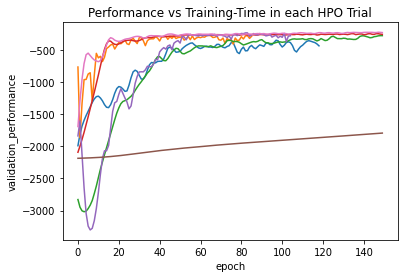

In [ ]:
hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = {  
    'num_epochs': 150,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': ag.space.Categorical('relu','softrelu','tanh','softrelu','softsign'), #changed layers
   'layers': ag.space.Categorical([500],[300,200],[300],[50],[1]),    
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  
    'num_boost_round': 100,  
    'num_leaves': ag.space.Int(lower=14, upper=46, default=36),  
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options, 
                   'NN': nn_options,  
                  }  
time_limits = 3*60  # train various models for ~3 min
num_trials = 7  
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine

predictor2 = task.fit(train_data=train_data, tuning_data=test_data, label=label_column2,
                     time_limits=time_limits, eval_metric=metric, num_trials=num_trials,
                     hyperparameter_tune=hp_tune, hyperparameters=hyperparameters,
                     search_strategy=search_strategy)

In [ ]:
predictor2.get_model_best()


'WeightedEnsemble_L1'

# Evaluation: root_mean_squared_error on test data: 124.245 is one of my best root mean square errors for NFL, upon making efforts to maximize it to 0. Again, I use auxillary metrics to dive deeper into it's evaluation.

In [ ]:
y_pred = predictor2.predict(test_data_nolabel2)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor2.evaluate_predictions(y_true=y_test2, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: 124.24506683006959
Evaluations on test data:
{
    "root_mean_squared_error": 124.24506683006959,
    "mean_absolute_error": 70.09952108528047,
    "explained_variance_score": 0.9965467251968594,
    "r2_score": 0.9965130892140444,
    "pearson_correlation": 0.9983710056599743,
    "mean_squared_error": 15436.83663160845,
    "median_absolute_error": 36.912365000000136
}


Predictions:   [12124.725, 12150.749, 12093.084, 12068.733, 12142.809]


*** Summary of fit() ***
Estimated performance of each model:
                      model    score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L1  -124.245067       0.020404  11.746350                0.000602           0.525409            1       True         15
1         LightGBM/trial_46  -127.431218       0.005845   0.834333                0.005845           0.834333            0       True          5
2         LightGBM/trial_42  -161.943996       0.005306   0.784924                0.005306           0.784924            0       True          1
3         LightGBM/trial_47  -169.639304       0.004449   0.851205                0.004449           0.851205            0       True          6
4         LightGBM/trial_45  -176.492314       0.004676   0.751631                0.004676           0.751631            0       True          4
5         LightGBM/trial_43  -198.829613       0.004966   0.779160  

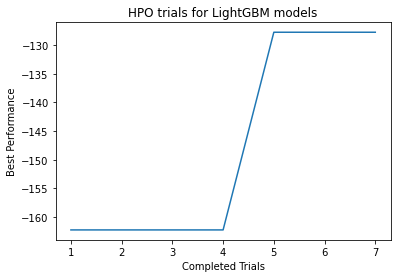

Plot summary of models saved to file: AutogluonModels/ag-20210712_220820/NeuralNetMXNet_HPOmodelsummary.html
Plot summary of models saved to file: NeuralNetMXNet_HPOmodelsummary.html
Plot of HPO performance saved to file: AutogluonModels/ag-20210712_220820/NeuralNetMXNet_HPOperformanceVStrials.png


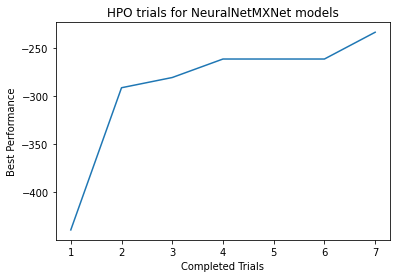

*** Details of Hyperparameter optimization ***
HPO for LightGBM model:  Num. configurations tried = 7, Time spent = 11.018033027648926s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: root_mean_squared_error = -127.74576091057348):
{'feature_fraction': 0.833575698879388, 'learning_rate': 0.06306471813663335, 'min_data_in_leaf': 11, 'num_leaves': 44}
HPO for NeuralNetMXNet model:  Num. configurations tried = 7, Time spent = 61.88604545593262s, Search strategy = skopt
Best hyperparameter-configuration (validation-performance: root_mean_squared_error = -233.86520385742188):
{'activation▁choice': 0, 'dropout_prob': 0.36343530653258976, 'embedding_size_factor': 1.32974661816632, 'layers▁choice': 0, 'learning_rate': 0.001003233526756515, 'network_type▁choice': 0, 'use_batchnorm▁choice': 1, 'weight_decay': 0.0016346717628968617}
*** End of fit() summary ***


In [ ]:
results = predictor2.fit_summary()

# Model ensembling with stacking/bagging and more tuning
Performance improve if you specify num_bagging_folds = 5-10, stack_ensemble_levels = 1-3 in the call to fit().
I provide all my available data as df because AutoGluon will split in more intellgent ways.


In [ ]:
predictor2 = task.fit(train_data=df, label=label_column2, eval_metric=metric,
                     num_bagging_folds=30, num_bagging_sets=2, stack_ensemble_levels=3,
                     hyperparameters = {'NN': {'num_epochs': 150}}  # last  argument is just for quick demo here, omit it in real applications
                    )

No output_directory specified. Models will be saved in: AutogluonModels/ag-20210712_211520/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20210712_211520/
AutoGluon Version:  0.0.16b20201214
Train Data Rows:    358
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (15814.822030000001, 7264.768634, 12296.56704, 2170.5496)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12476.25 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. S

In [ ]:
datapoint = test_data_nolabel2.iloc[[0]]  # Note: .iloc[0] won't work because it returns pandas Series instead of DataFrame
print(datapoint)
print(predictor2.predict(datapoint))

           NFO          NFH          NFC  ...    Flow  Shine      Vega
0  12115.67324  12177.11996  12216.27237  ...  0.0399   -0.1 -1.309999

[1 rows x 19 columns]
[12166.785]


#Top 3 tuned models:

In [ ]:
predictor2.leaderboard(test_data,extra_info=True, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,AG_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_AG_args_fit,ancestors,descendants
0,NeuralNetMXNet_BAG_L0,-82.973464,-208.594443,13.322341,10.477484,218.583157,13.322341,10.477484,218.583157,0,True,1,19,60,60,69245968,69245968,1158798,1158798,0,7,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Currey, FIIN, DIIN, August, DIIS, DAD, ...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 86},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L2, NeuralNetMXNet_BAG_L2, N..."
1,WeightedEnsemble_L1,-82.973464,-208.594443,13.324279,10.478179,218.586639,0.001938,0.000695,0.003482,1,True,2,1,1,61,2246,69248214,2246,1158798,1,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L0],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L0],[]
2,NeuralNetMXNet_BAG_L1,-92.590987,-225.341461,26.334172,21.117816,437.890202,13.011831,10.640332,219.307045,1,True,3,20,60,120,69971240,139217208,1170996,1170996,1,5,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 85},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L0],"[WeightedEnsemble_L2, NeuralNetMXNet_BAG_L2, N..."
3,WeightedEnsemble_L2,-92.590987,-225.341461,26.336172,21.118436,437.891840,0.002001,0.000621,0.001638,2,True,4,1,1,121,2246,139219454,2246,1170996,2,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L1],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L0]",[]
4,NeuralNetMXNet_BAG_L3,-92.768257,-224.499014,52.522639,44.914519,928.296843,13.150153,12.420857,252.898142,3,True,7,20,60,240,69973984,279162432,1170996,1171068,3,1,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epochs': 150, 'epochs_wo_improve': 20, '...",{'num_epochs': 85},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L2,...",[WeightedEnsemble_L4]
5,WeightedEnsemble_L4,-92.768257,-224.499014,52.524081,44.915208,928.299958,0.001442,0.000690,0.003115,4,True,8,1,1,241,2246,279164678,2246,1171068,4,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models'...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[NeuralNetMXNet_BAG_L3],{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[NeuralNetMXNet_BAG_L1, NeuralNetMXNet_BAG_L2,...",[]
6,NeuralNetMXNet_BAG_L2,-94.156248,-208.399064,39.372486,32.493661,675.398701,13.038314,11.375845,237.508499,2,True,5,20,60,180,69971240,209188448,1171068,1171068,2,3,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models':...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[FIIS, Vega, Currey, FIIN, DIIN, August, DIIS,...","{'num_epochs': 150, 'epochs_wo_improve'

# Conclusion:
Predicting NFH with an mse of 104 and NFL with an mse of 118, I would appreciate if the jury had any pointers or constructive criticism to offer. 



In [ ]:
!zip -r /content/AutogluonModels/BEST14.zip /content/AutogluonModels/BEST14

  adding: content/AutogluonModels/BEST14/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/WeightedEnsemble_L1/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/WeightedEnsemble_L1/model.pkl (deflated 49%)
  adding: content/AutogluonModels/BEST14/models/WeightedEnsemble_L1/utils/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/WeightedEnsemble_L1/utils/oof.pkl (deflated 23%)
  adding: content/AutogluonModels/BEST14/models/WeightedEnsemble_L1/utils/model_template.pkl (deflated 50%)
  adding: content/AutogluonModels/BEST14/models/LightGBM/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/LightGBM/dataset_val.bin (deflated 40%)
  adding: content/AutogluonModels/BEST14/models/LightGBM/trial_563/ (stored 0%)
  adding: content/AutogluonModels/BEST14/models/LightGBM/trial_563/model.pkl (deflated 67%)
  adding: content/AutogluonModels/BEST14/models/LightGBM/trial_565/ (stored 0%)
  adding:

In [ ]:
while true:
  pass